In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [2]:
inputpath=[]
label=[]
path=r"PetImages"
for i in os.listdir(path):
    for files in os.listdir(path+'/'+i):
        if i =="Cat":
            label.append(0)
        else:
            label.append(1)
        inputpath.append(os.path.join(path,i,files))
print(inputpath[23000], label[23000])
print(inputpath[0], label[0])

PetImages\Dog\8198.jpg 1
PetImages\Cat\0.jpg 0


In [3]:
df=pd.DataFrame()
df['images']=inputpath
df['label']=label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages\Cat\9090.jpg      0
1  PetImages\Dog\12117.jpg      1
2   PetImages\Dog\8912.jpg      1
3    PetImages\Dog\693.jpg      1
4   PetImages\Cat\8906.jpg      0

In [4]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages\Dog\Thumbs.db
PetImages\Cat\Thumbs.db


In [5]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages\\Dog\\11702.jpg',
 'PetImages\\Cat\\666.jpg',
 'PetImages\\Dog\\Thumbs.db',
 'PetImages\\Cat\\Thumbs.db']

In [6]:
for i in l:
    df=df[df['images']!=i]
len(df)

24998

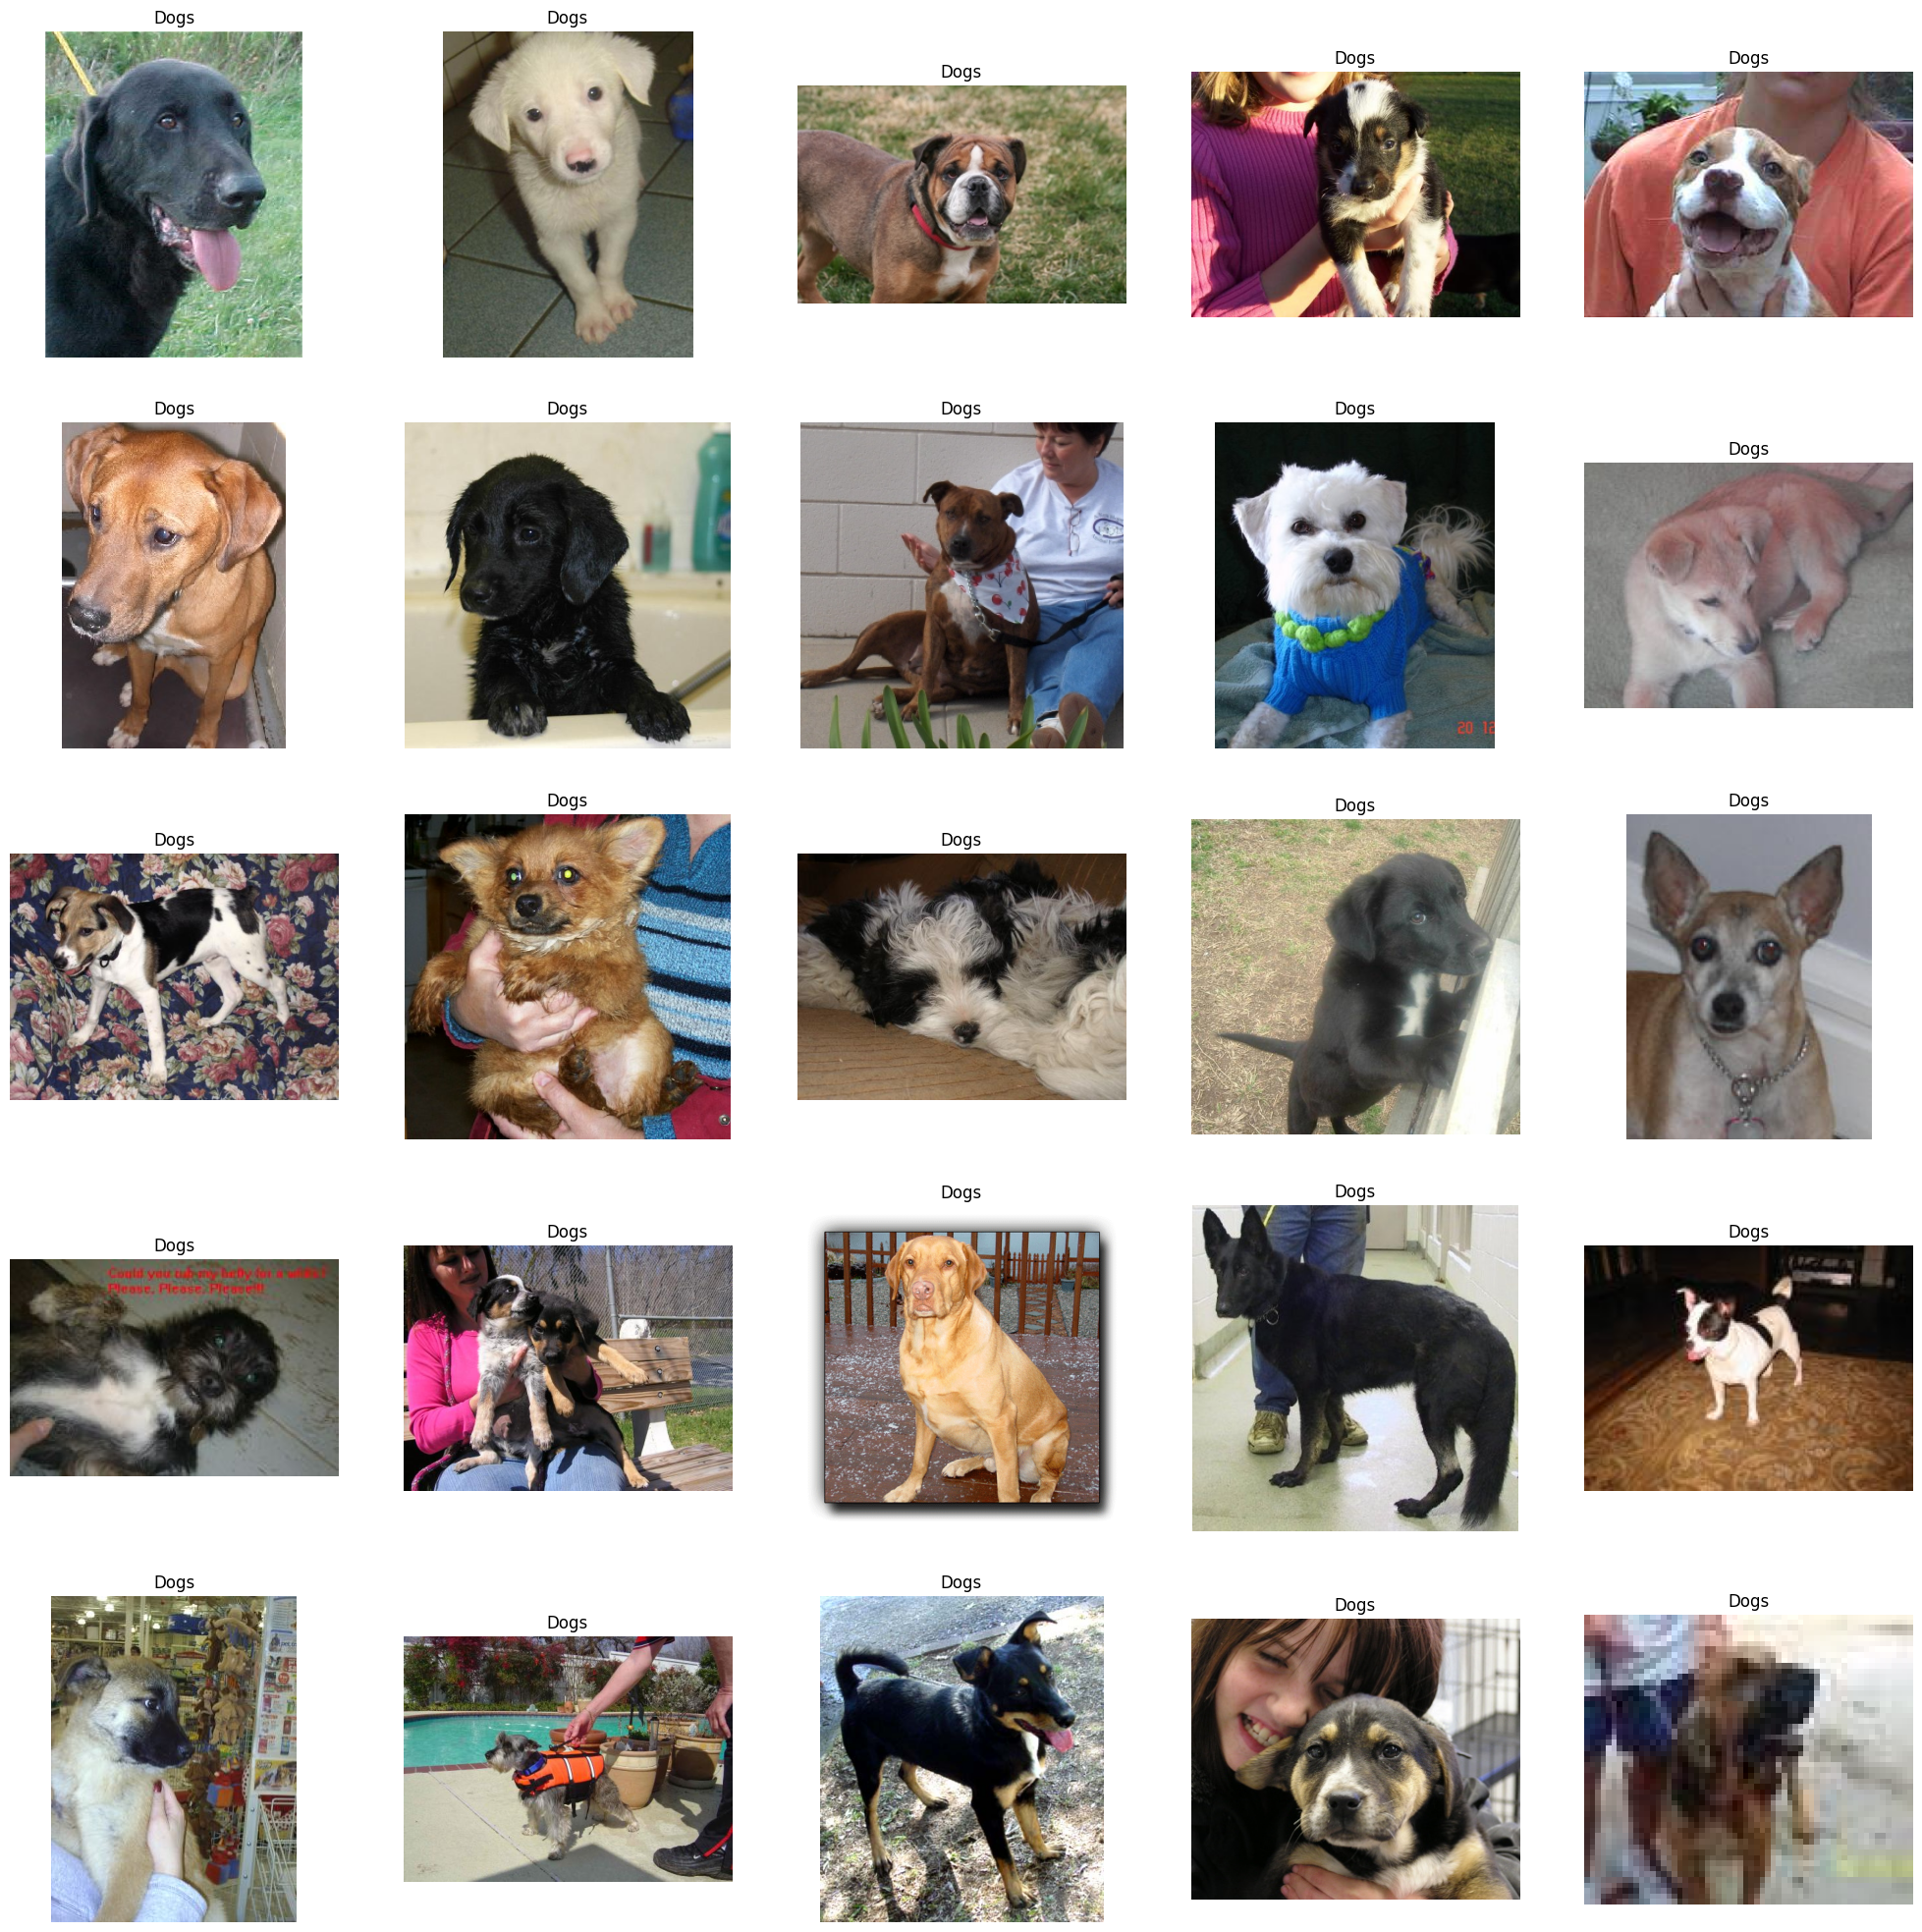

In [7]:
plt.figure(figsize=(25,25))
dogs=df[df['label']==1]['images']
idx= random.randint(0, len(dogs))
files=dogs[idx:idx+25]

for indx, file in enumerate(files):
    plt.subplot(5,5, indx+1)
    img= load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('Off')

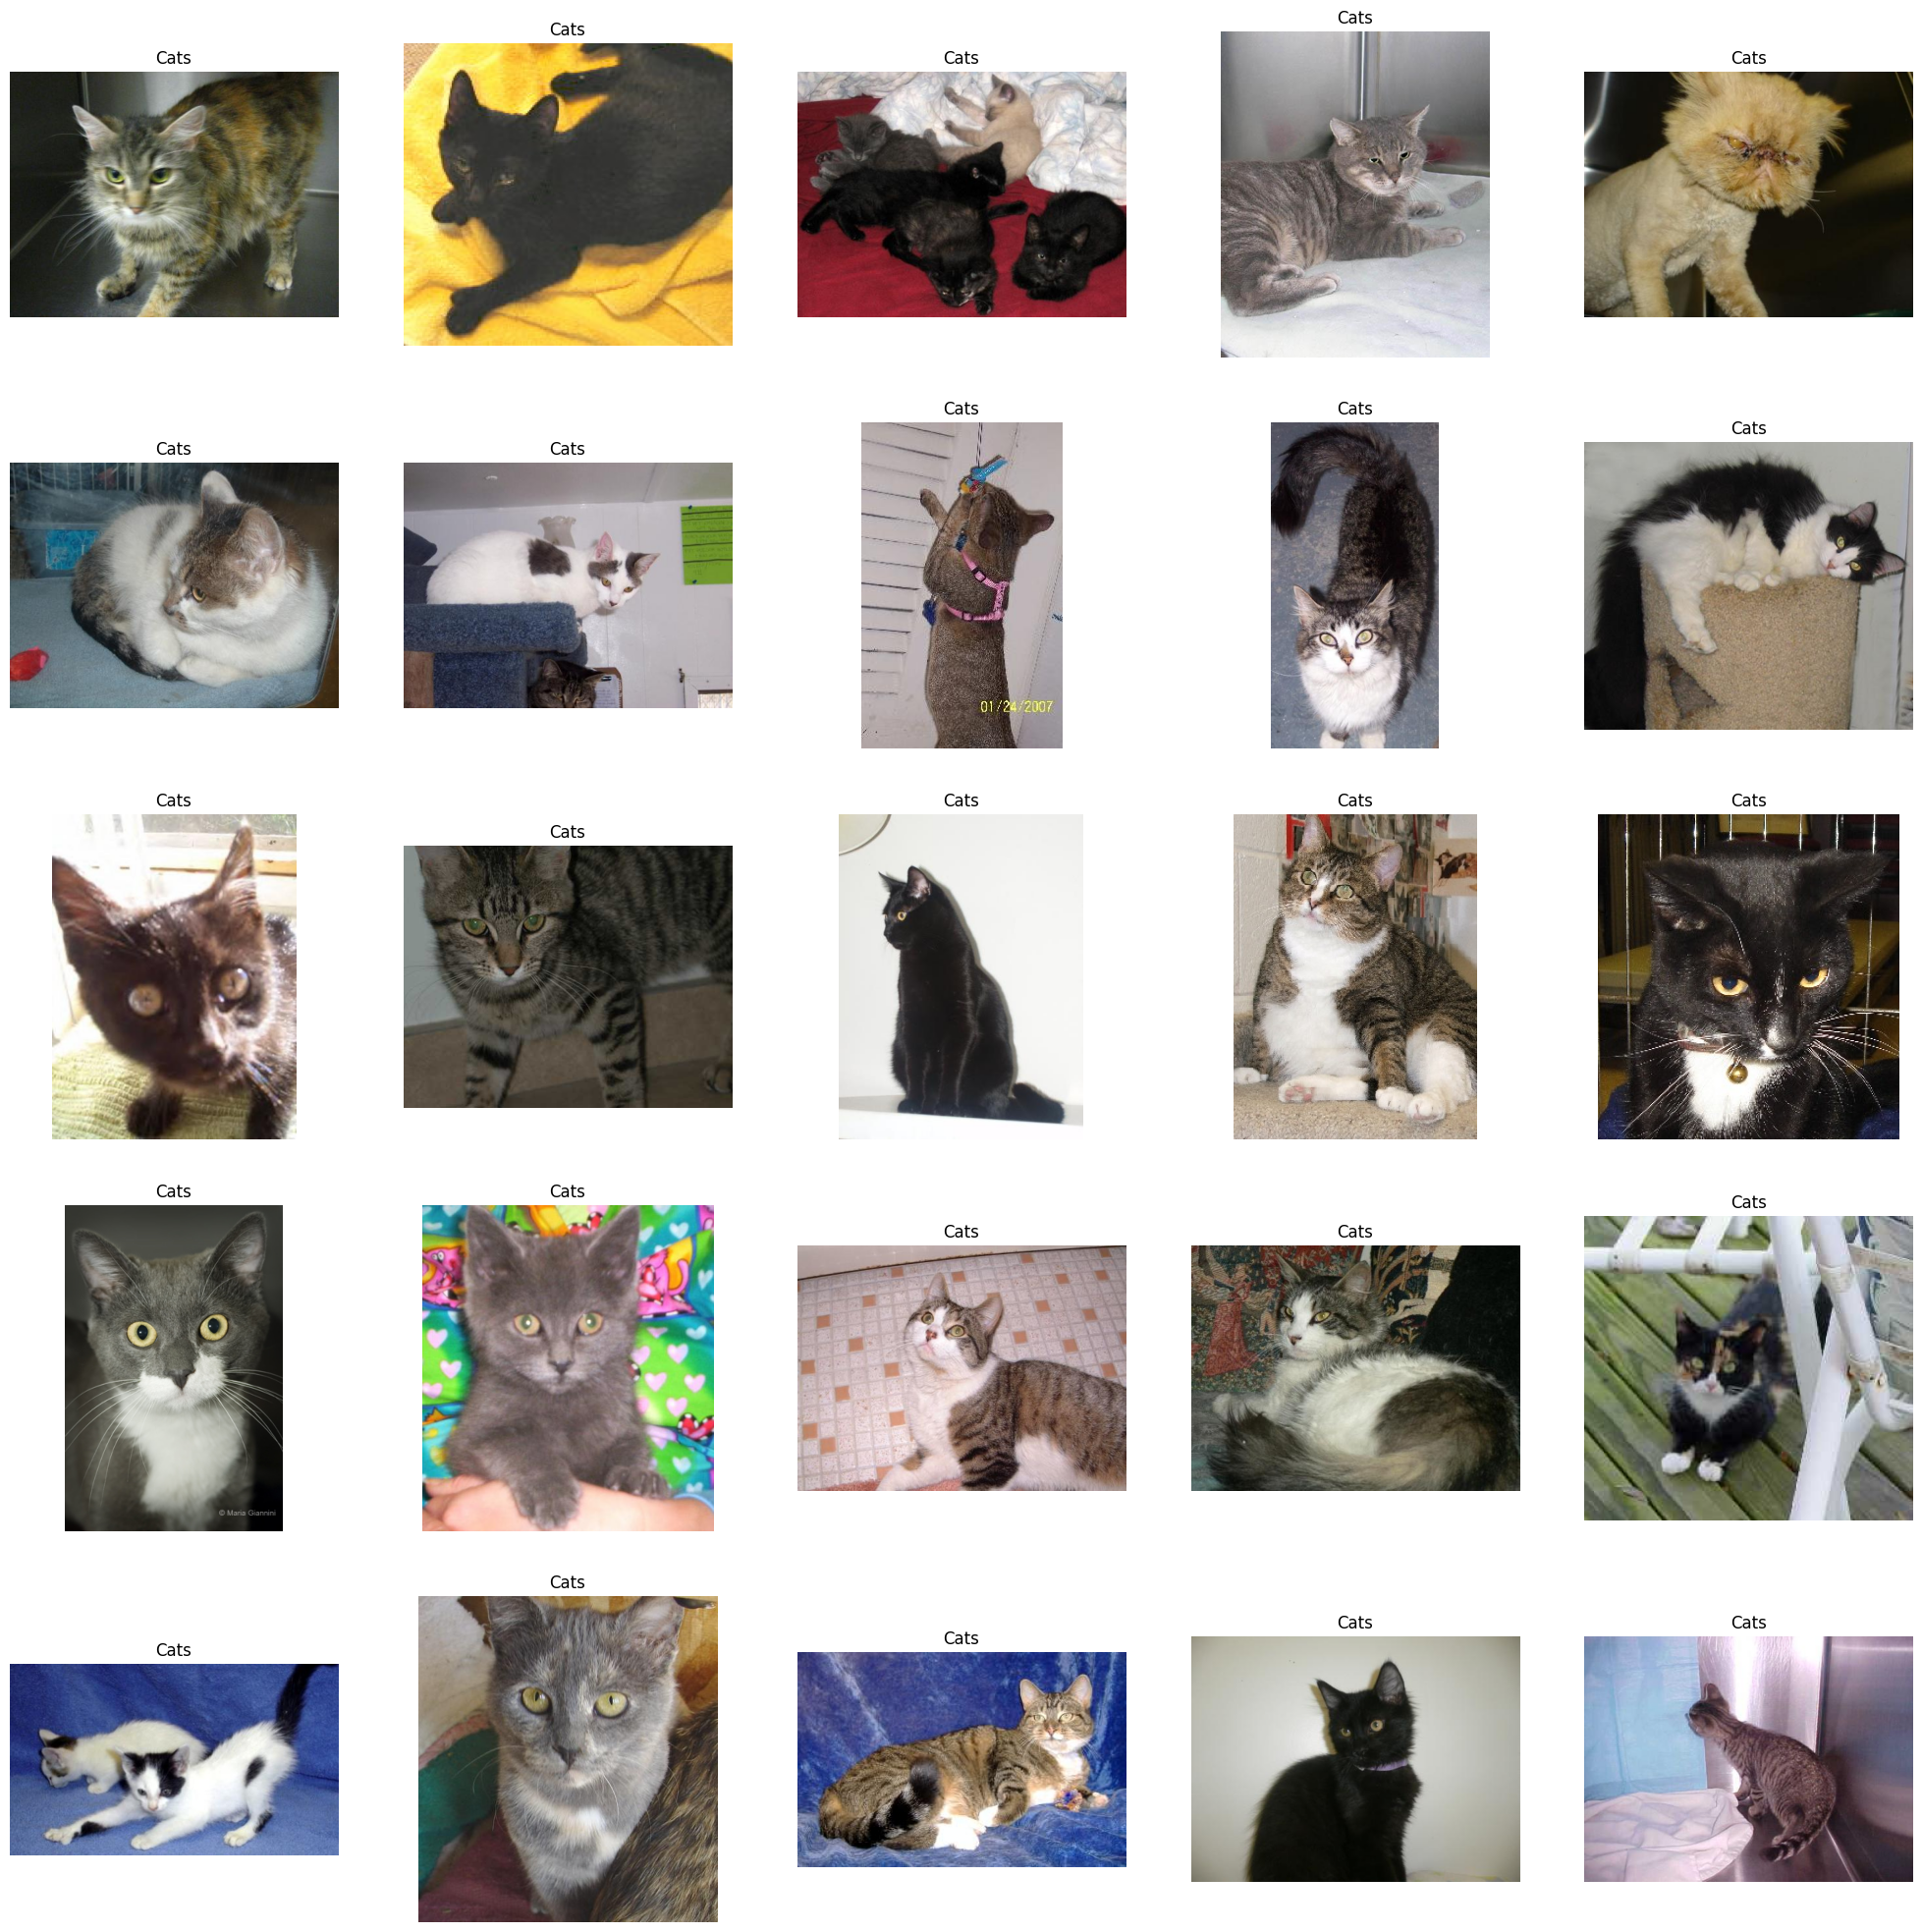

In [8]:
plt.figure(figsize=(25,25))
cats=df[df['label']==0]['images']
idxc=random.randint(0, len(cats))
Cfiles=cats[idx:idx+25]


for indxc, cfile in enumerate(Cfiles):
    plt.subplot(5,5, indxc+1)
    img=load_img(cfile)
    img=np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('Off')

In [15]:
df['label']=df['label'].astype(str)
df.head()

images label
0   PetImages\Cat\9090.jpg     0
1  PetImages\Dog\12117.jpg     1
2   PetImages\Dog\8912.jpg     1
3    PetImages\Dog\693.jpg     1
4   PetImages\Cat\8906.jpg     0

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=42, test_size=0.2)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale= 1./255, rotation_range= 30, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True, fill_mode= 'nearest')
val_generator = ImageDataGenerator(rescale= 1./255)
train_iterator = train_generator.flow_from_dataframe(train, x_col='images', y_col='label', target_size=(128, 128), batch_size=512, class_mode='binary')
val_iterator = val_generator.flow_from_dataframe(test, x_col='images', y_col='label', target_size=(128,128), batch_size=512, class_mode='binary')


Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model= Sequential([Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                  MaxPool2D((2,2)),
                  Conv2D(32, (3,3), activation='relu'),
                  MaxPool2D((2,2)),
                  Conv2D(64, (3,3), activation='relu'),
                  MaxPool2D((2,2)),
                  Flatten(),
                  Dense(512, activation='relu'),
                  Dense(1, activation='sigmoid'),
                  ])


In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 275s 7s/step - accuracy: 0.5281 - loss: 0.7963 - val_accuracy: 0.6562 - val_loss: 0.6307
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 371s 9s/step - accuracy: 0.6258 - loss: 0.6420 - val_accuracy: 0.7018 - val_loss: 0.5824
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 197s 5s/step - accuracy: 0.6934 - loss: 0.5884 - val_accuracy: 0.7366 - val_loss: 0.5390
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.7296 - loss: 0.5378 - val_accuracy: 0.7448 - val_loss: 0.5265
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.7495 - loss: 0.5068 - val_accuracy: 0.7512 - val_loss: 0.5104
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.7535 - loss: 0.5088 - val_accuracy: 0.7806 - val_loss: 0.4668
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.7770 - loss: 0.4685 - val_accuracy: 0.7938 - val_loss: 0.4477
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.7864 - loss: 0.4503 - val_accuracy: 0.8130 - v

In [44]:
image_path=r"C:\Users\Manoj\Downloads\th.jpeg"
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Cat


In [46]:
model.save('catvsdogclassification.h5')

In [47]:
model.save('catvsdogclassification.keras')